In [58]:
#Student ID: 1001420223
#Student name: Aaron Chen
#Instructor: Shion Guha
#Course code: INF2178
#Course name: Experimental Design for Data Science
#Faculty of Information
#University of Toronto
#Technical Assignment 2

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# load data from google drive (change path if needed)
dataset = pd.read_excel('/content/drive/MyDrive/inf2178/INF2178_A2_data.xlsx', index_col=0)

In [62]:
# get a over view of dataset
dataset.describe()

,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,"1,063.00","1,063.00","1,063.00","1,063.00","1,063.00","1,063.00","1,063.00","1,063.00"
mean,"8,087.89",12.51,3.90,11.60,24.26,14.26,21.66,75.67
std,"5,151.25",7.03,6.09,12.09,18.58,20.49,30.42,47.82
min,"1,013.00",1.00,0.00,0.00,0.00,0.00,0.00,6.00
25%,"1,862.00",6.00,0.00,0.00,16.00,0.00,0.00,43.00
50%,"8,826.00",12.00,0.00,10.00,24.00,0.00,0.00,62.00
75%,"13,245.00",19.00,10.00,15.00,32.00,26.00,30.00,97.00
max,"14,504.00",25.00,30.00,90.00,144.00,130.00,285.00,402.00


In [63]:
# check null values
dataset.isna().any()

LOC_ID         False
LOC_NAME       False
AUSPICE        False
ADDRESS        False
PCODE          False
ward           False
bldg_type      False
BLDGNAME        True
IGSPACE        False
TGSPACE        False
PGSPACE        False
KGSPACE        False
SGSPACE        False
TOTSPACE       False
subsidy        False
cwelcc_flag    False
dtype: bool

In [64]:
# count how many category in categorical columns that we are
# interested in and check null
print('Operating auspice')
print(dataset['AUSPICE'].unique())
print('city ward number')
print(dataset['ward'].unique())
print('If centre has a fee subsidy contract')
print(dataset['subsidy'].unique())

Operating auspice
['Non Profit Agency' 'Commercial Agency' 'Public (City Operated) Agency']
city ward number
[ 3  8 25 10 20 24  6 19  4  1 14  5  7 17  2 15  9 18 11 12 21 23 22 13
 16]
If centre has a fee subsidy contract
['Y' 'N']


In [65]:
# after examining the categorical data we will mainly
# work with Operating auspice, subsidy and CWELCC when conducting ANOVA
# total space will be the variable we are interested in

Text(0.5, 1.0, 'Operating auspice Count')

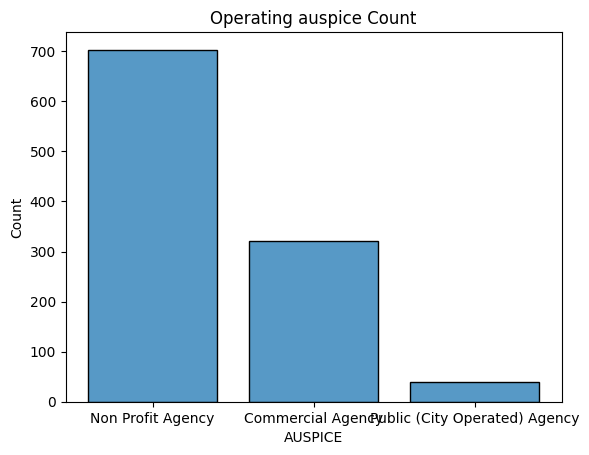

In [66]:
# get distribution of operating auspice
sns.histplot(
    data=dataset,
    x="AUSPICE", multiple="dodge", shrink=.8
).set_title('Operating auspice Count')

Text(0.5, 1.0, 'histogram of total space count of different auspice')

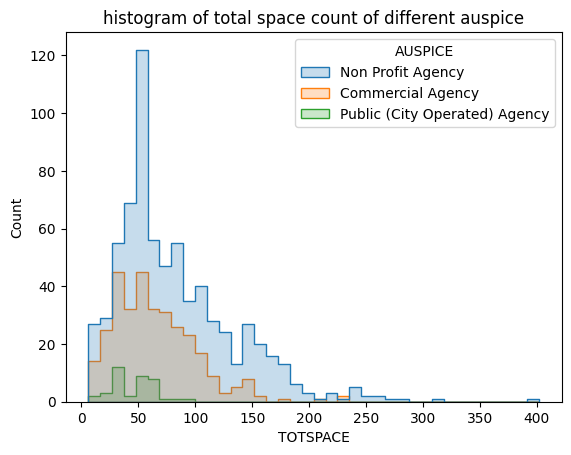

In [67]:
# plot histogram of auspice
sns.histplot(data=dataset, x="TOTSPACE", hue="AUSPICE", element="step").set_title('histogram of total space count of different auspice')

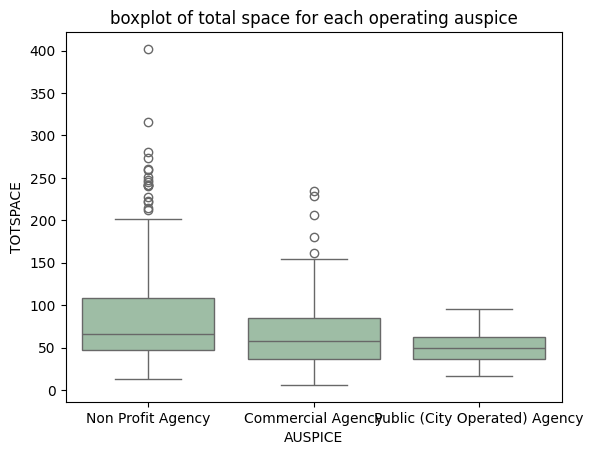

In [68]:
# plot a boxplot for total space and operating auspice
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=dataset, color='#99c2a2').set_title('boxplot of total space for each operating auspice')
plt.show()

In [69]:
# ANOVA table
res = stat()
res.anova_stat(df=dataset, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.00,"96,112.11","48,056.06",21.84,0.00
Residual,"1,060.00","2,332,065.26","2,200.06",NaN,NaN


In [70]:
#post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=dataset, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.81,3.99,29.62,4.36,0.01
1,Non Profit Agency,Public (City Operated) Agency,36.18,8.67,63.68,4.37,0.01
2,Commercial Agency,Public (City Operated) Agency,19.37,-10.14,48.88,2.18,0.27


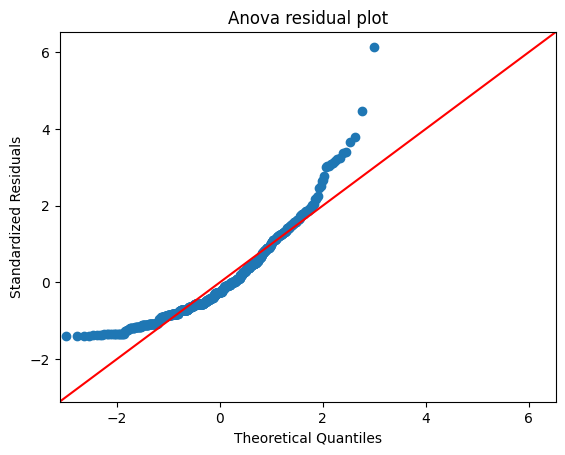

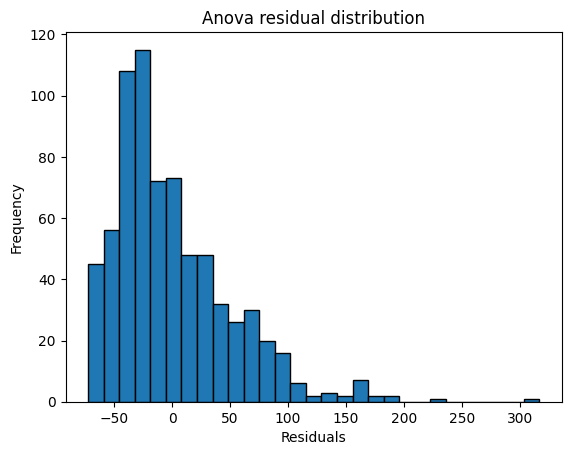

In [71]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Anova residual plot')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Anova residual distribution')
plt.show()

In [72]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [73]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=dataset, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.20
1,Degrees of freedom (Df),2.00
2,p value,0.00


Text(0.5, 1.0, 'boxplot of total space for each operating auspice and subsidy')

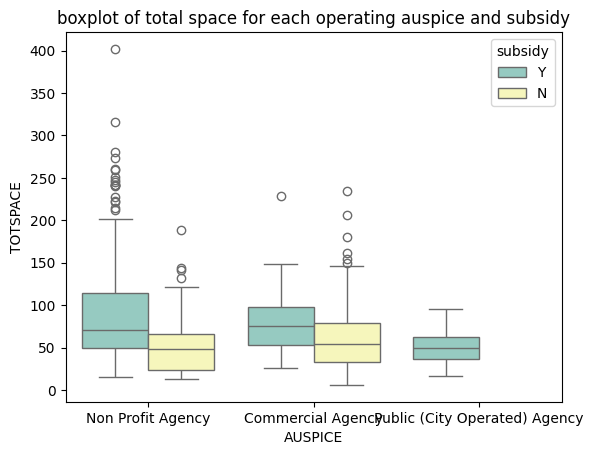

In [74]:
# plot a boxplot for total space and operating auspice and subsidy
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=dataset, palette="Set3").set_title('boxplot of total space for each operating auspice and subsidy')

In [75]:
# ANOVA model
res = stat()
res.anova_stat(df=dataset, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.00,"8,568.00","4,284.00",2.06,0.13
C(subsidy),1.00,"83,527.44","83,527.44",40.12,0.00
C(AUSPICE):C(subsidy),2.00,"56,034.45","28,017.23",13.46,0.00
Residual,"1,058.00","2,202,809.39","2,082.05",NaN,NaN


In [76]:
#post hoc test using Tukey's HSD
res.tukey_hsd(df=dataset, res_var='TOTSPACE',xfac_var=['AUSPICE', 'subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.99,25.58,64.39,9.37,0.00
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.15,-28.47,28.76,0.02,0.90
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.37,11.19,45.55,6.67,0.00
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.75,8.31,73.20,5.08,0.00
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.00,-inf,inf,0.00,0.90
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",44.84,11.40,78.28,5.42,0.00
6,"(Non Profit Agency, N)","(Commercial Agency, N)",16.62,-7.78,41.01,2.75,0.38
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.23,-32.54,41.01,0.47,0.90
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.00,-inf,inf,0.00,0.90
9,"(Commercial Agency, Y)","(Commercial Agency, N)",28.23,-3.98,60.43,3.54,0.12


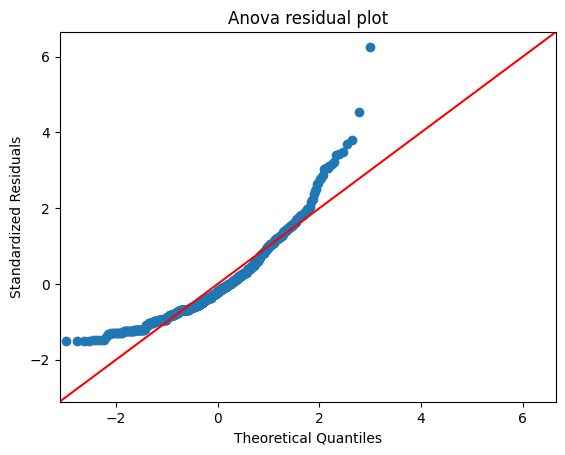

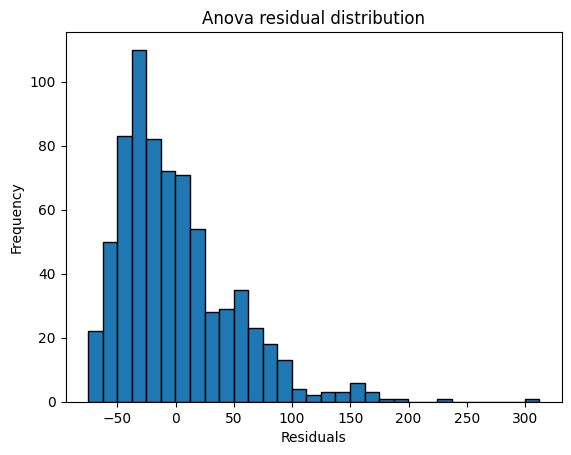

In [77]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title('Anova residual plot')
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title('Anova residual distribution')
plt.show()

In [78]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.9018619656562805 1.5311055543621852e-25


In [79]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=dataset, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.20
1,Degrees of freedom (Df),2.00
2,p value,0.00
